### Importing Set Up - using Python 3.11.5

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from IPython.display import display

### Database Creation

In [ ]:
execfile("Setup_and_Organization/Database Setup.py")

### SQLite Database Connection

In [2]:
engine = create_engine("sqlite:///Resources/database.sqlite")
conn=engine.connect()

# reflect an existing database into a new model
base = automap_base()
# reflect the tables
# base.prepare(engine,reflect=True)

base.prepare(autoload_with=engine)

### Data File Loading

In [12]:
data = pd.read_sql('SELECT g.gender_name, b.bmi_name, o.occupation_name, h.stress_level, h.heart_rate, h.systolic, h.diastolic, \
            p.gender_id, s.sleep_duration, s.sleep_quality, p.age, sd.sleep_disorder_name, s.person_id\
            FROM person AS p\
            INNER JOIN sleep AS s\
            ON s.person_id = p.id\
            INNER JOIN occupation AS o\
            ON o.id = p.occupation_id\
            INNER JOIN gender AS g\
            ON p.gender_id = g.id\
            INNER JOIN sleep_disorder AS sd\
            ON sd.id = s.sleep_disorder_id\
            INNER JOIN health AS h\
            ON h.person_id = p.id\
            INNER JOIN bmi AS b\
            ON b.id = h.bmi_id',
            conn) 

data

,gender_name,bmi_name,occupation_name,stress_level,heart_rate,systolic,diastolic,gender_id,sleep_duration,sleep_quality,age,sleep_disorder_name,person_id
0,Male,Overweight,Software Engineer,6,77,126,83,0,6.1,6,27,None,1
1,Male,Obese,Software Engineer,8,85,140,90,0,5.9,4,28,Insomnia,6
2,Male,Normal,Software Engineer,5,70,120,80,0,7.5,8,35,None,85
3,Male,Normal,Software Engineer,5,70,120,80,0,7.5,8,35,None,93
4,Male,Normal,Doctor,8,75,125,80,0,6.2,6,28,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,Overweight,Scientist,6,76,128,85,1,6.2,6,33,None,69
370,Female,Overweight,Scientist,6,76,128,85,1,6.2,6,33,None,70
371,Female,Overweight,Scientist,8,81,131,86,1,5.8,4,34,Sleep Apnea,81
372,Female,Overweight,Scientist,8,81,131,86,1,5.8,4,34,Sleep Apnea,82


### Bryan's Visualization / Interaction

In [13]:
dd = widgets.Dropdown(
    options = {"Age": "age", "Stress Level": "stress_level", "Heart Rate": "heart_rate", "Systolic": "systolic", "Diastolic": "diastolic"},
    value = "age",
    description = "Category"
)

# genders = data["gender_name"].unique().tolist()

dd1 = widgets.Dropdown(
    options = ["All", "Male", "Female"],
    value = "All",
    description = "Gender"
)

# bmis = data["bmi_name"].unique().tolist()

dd2 = widgets.Dropdown(
    options = ["All", "Normal", "Overweight", "Obese"],
    value = "All",
    description = "BMI Type"
)

def draw_plot(column, item1, item2):    
    
    if (item1 == "All"):
        if (item2 == "All"):
            mask = (data["gender_name"].isin(["Male", "Female"])) & (data["bmi_name"].isin(["Normal", "Overweight", "Obese"]))
        else:
            mask = (data["gender_name"].isin(["Male", "Female"])) & (data["bmi_name"] == item2)
    else:
        if (item2 == "All"):
            mask = (data["gender_name"] == item1) & (data["bmi_name"].isin(["Normal", "Overweight", "Obese"]))
        else:
            mask = (data["gender_name"] == item1) & (data["bmi_name"] == item2)
    #sns.set_theme(style = "ticks")
    f, ax = plt.subplots(figsize = (8, 6))
    sns.boxplot(x = data.loc[mask, column],
                y = data.loc[mask, "occupation_name"], 
                hue = data["occupation_name"],
                palette = "Paired",
                width = 0.6,
                legend = False
    )
    sns.stripplot(
        x = data.loc[mask, column],
        y = data.loc[mask, "occupation_name"],
        color = "black",
        dodge = True,
        edgecolor = "black"
    )

    column_proper = column.replace("_", " ").title()
    ax.set_xlabel(column_proper, fontsize = 15)
    ax.set_ylabel("Occupation", fontsize = 15)
    plt.title(f"Distribution of {column_proper} per Occupation ({item1})", fontsize = 18)

ddbox = widgets.HBox([dd, dd1, dd2])
out1 = widgets.interactive_output(draw_plot, {"column": dd, "item1": dd1, "item2": dd2})
display(ddbox, out1)

Output()

### Reed's Visualization / Interaction

In [14]:
# Create a dropdown widget to select gender
gender_dropdown = widgets.Dropdown(
    options={'Male': 0, 'Female': 1},
    description='Gender:'
)
def draw_plot2(item):
    sns.relplot(x=data.loc[data["gender_id"] == item, "age"],
                y=data.loc[data["gender_id"]== item,"sleep_duration"],
                hue=data.loc[data["gender_id"]== item,"stress_level"],
                size=data.loc[data["gender_id"]== item,"sleep_quality"],
                sizes=(40, 400),
                alpha=.5,
                palette="Paired",
                height=6,
                data=data)\
            .set(title= "Sleep Duration vs Age")
out1= widgets.interactive_output(draw_plot2,{"item":gender_dropdown})
display(gender_dropdown,out1)

Dropdown(description='Gender:', options={'Male': 0, 'Female': 1}, value=0)

Output()

### Andrew's Visualization / Interaction

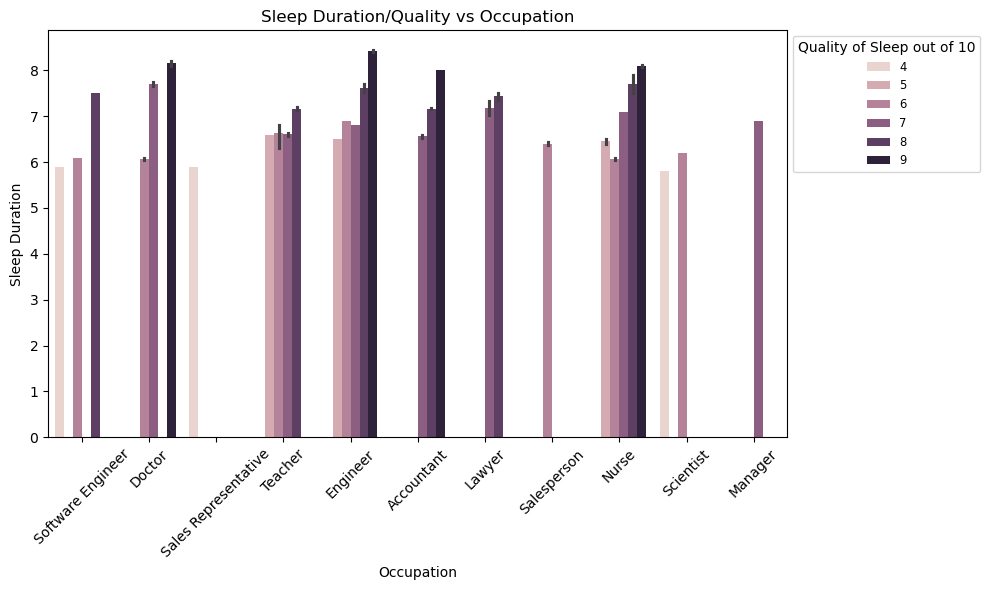

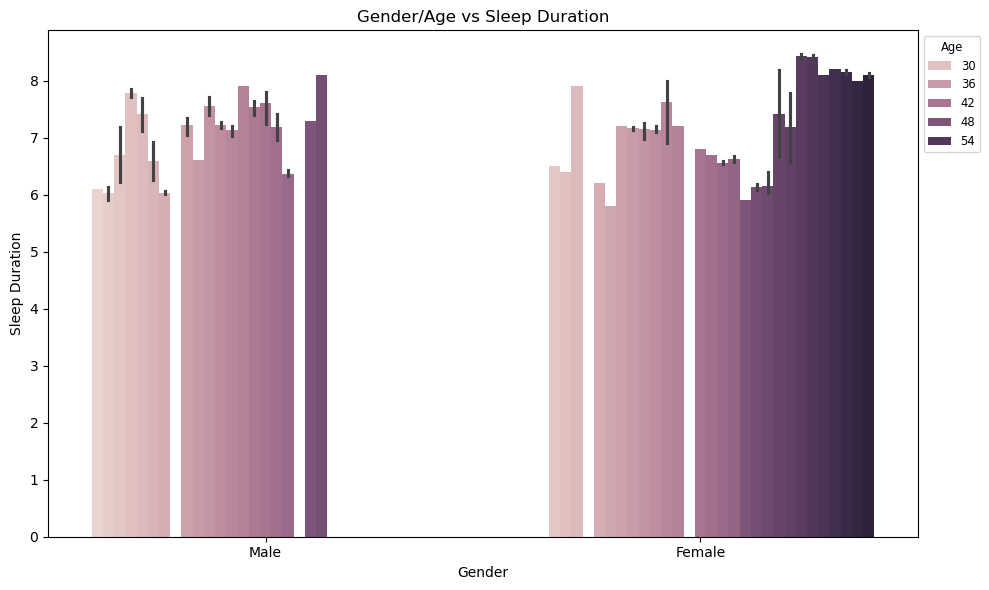

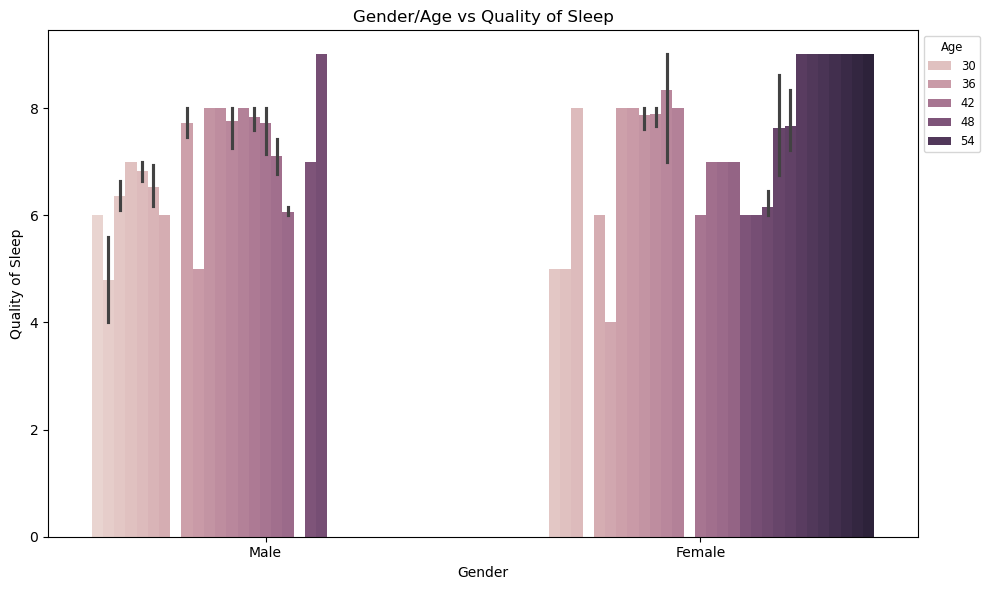

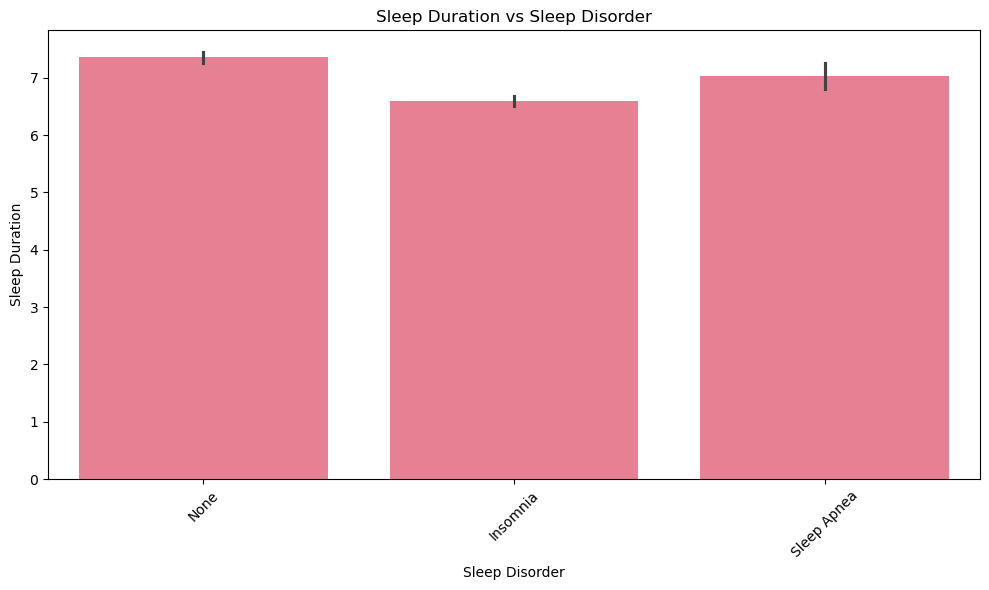

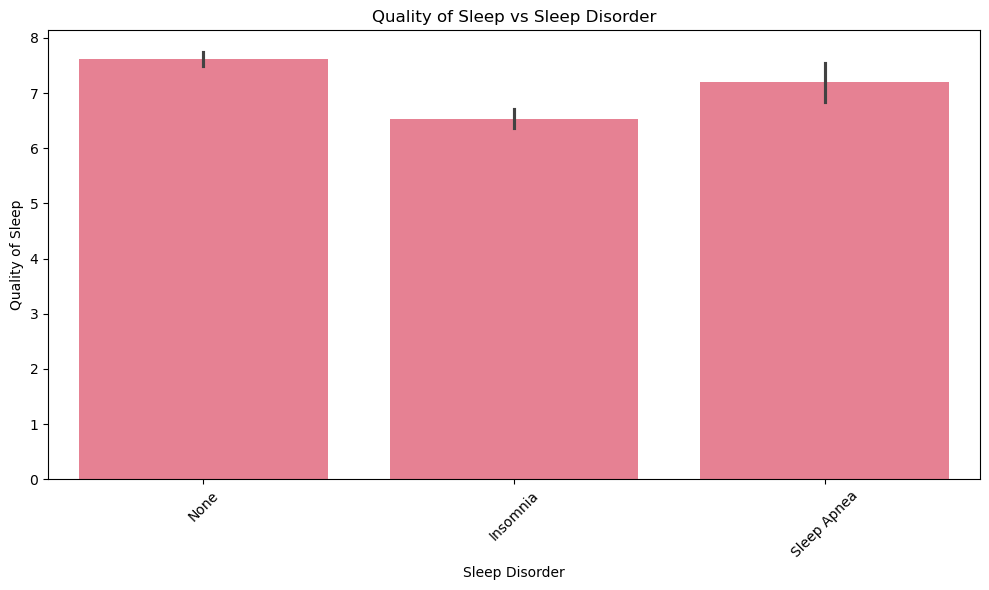

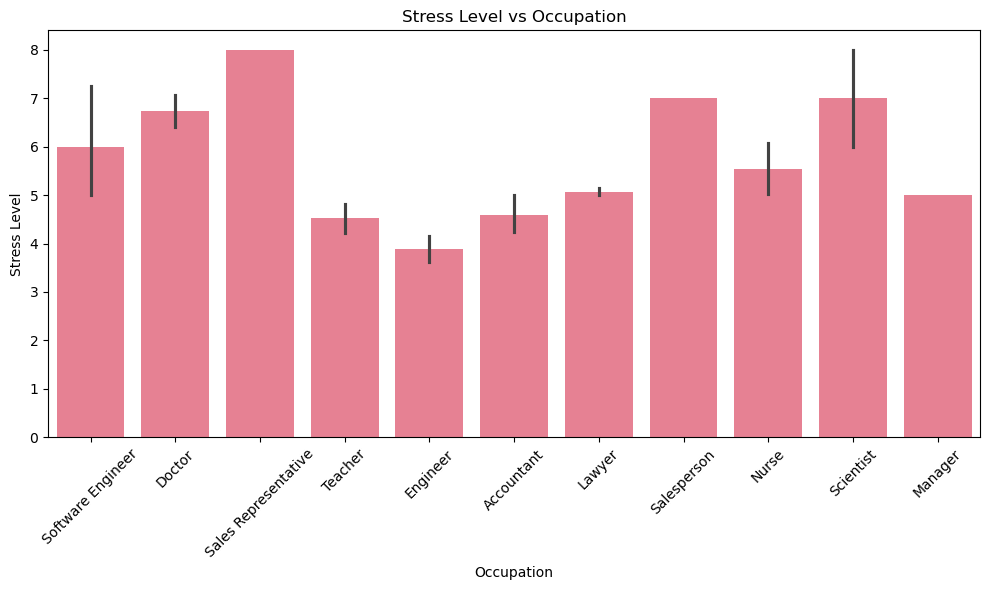

In [15]:
# Set a custom color palette
sns.set_palette("husl")
# 1. Sleep Duration/Quality vs Occupation
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='occupation_name', y='sleep_duration', hue='sleep_quality')
plt.title('Sleep Duration/Quality vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
# Rotate the job titles by 45 degrees
plt.xticks(rotation=45)
# Customize legend labels as numbers from 0 to 10 and legend title
legend_labels = [f'{label}/10' for label in range(11)]
legend_title = 'Quality of Sleep out of 10'
legend = plt.legend(title=legend_title, loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
if len(legend_labels) == len(legend.get_texts()):
    for i, text in enumerate(legend_labels):
        legend.get_texts()[i].set_text(text)
plt.tight_layout()
# 2. Gender/Age vs Sleep Duration/Quality
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='gender_name', y='sleep_duration', hue='age')
plt.title('Gender/Age vs Sleep Duration')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
legend = plt.legend(title='Age', loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
legend.set_title('Age', prop={'size': 'small'})
plt.tight_layout()
# 3. Gender/Age vs Quality of Sleep
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='gender_name', y='sleep_quality', hue='age')
plt.title('Gender/Age vs Quality of Sleep')
plt.xlabel('Gender')
plt.ylabel('Quality of Sleep')
legend = plt.legend(title='Age', loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
legend.set_title('Age', prop={'size': 'small'})
plt.tight_layout()
# 4. Sleep Duration/Quality vs Sleep Disorder
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='sleep_disorder_name', y='sleep_duration')
plt.title('Sleep Duration vs Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45)
plt.tight_layout()
# 5. Quality of Sleep vs Sleep Disorder
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='sleep_disorder_name', y='sleep_quality')
plt.title('Quality of Sleep vs Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45)
plt.tight_layout()
# 6. Stress Level vs Occupation
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='occupation_name', y='stress_level')
plt.title('Stress Level vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Stress Level')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Tom's Visualization / Interaction

In [10]:
data

,index,id,gender_id,age,occupation_id,index,id,person_id,sleep_duration,sleep_quality,...,person_id,blood_pressure,stress_level,heart_rate,systolic,diastolic,bmi_id,index,id,bmi_name
0,0,1,0,27,0,0,0,1,6.1,6,...,1,126/83,6,77,126,83,0,0,0,Overweight
1,1,6,0,28,0,297,297,6,5.9,4,...,6,140/90,8,85,140,90,2,2,2,Obese
2,2,85,0,35,0,71,71,85,7.5,8,...,85,120/80,5,70,120,80,1,1,1,Normal
3,3,93,0,35,0,79,79,93,7.5,8,...,93,120/80,5,70,120,80,1,1,1,Normal
4,4,2,0,28,1,1,1,2,6.2,6,...,2,125/80,8,75,125,80,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,369,69,1,33,7,57,57,69,6.2,6,...,69,128/85,6,76,128,85,0,0,0,Overweight
370,370,70,1,33,7,58,58,70,6.2,6,...,70,128/85,6,76,128,85,0,0,0,Overweight
371,371,81,1,34,7,225,225,81,5.8,4,...,81,131/86,8,81,131,86,0,0,0,Overweight
372,372,82,1,34,7,226,226,82,5.8,4,...,82,131/86,8,81,131,86,0,0,0,Overweight


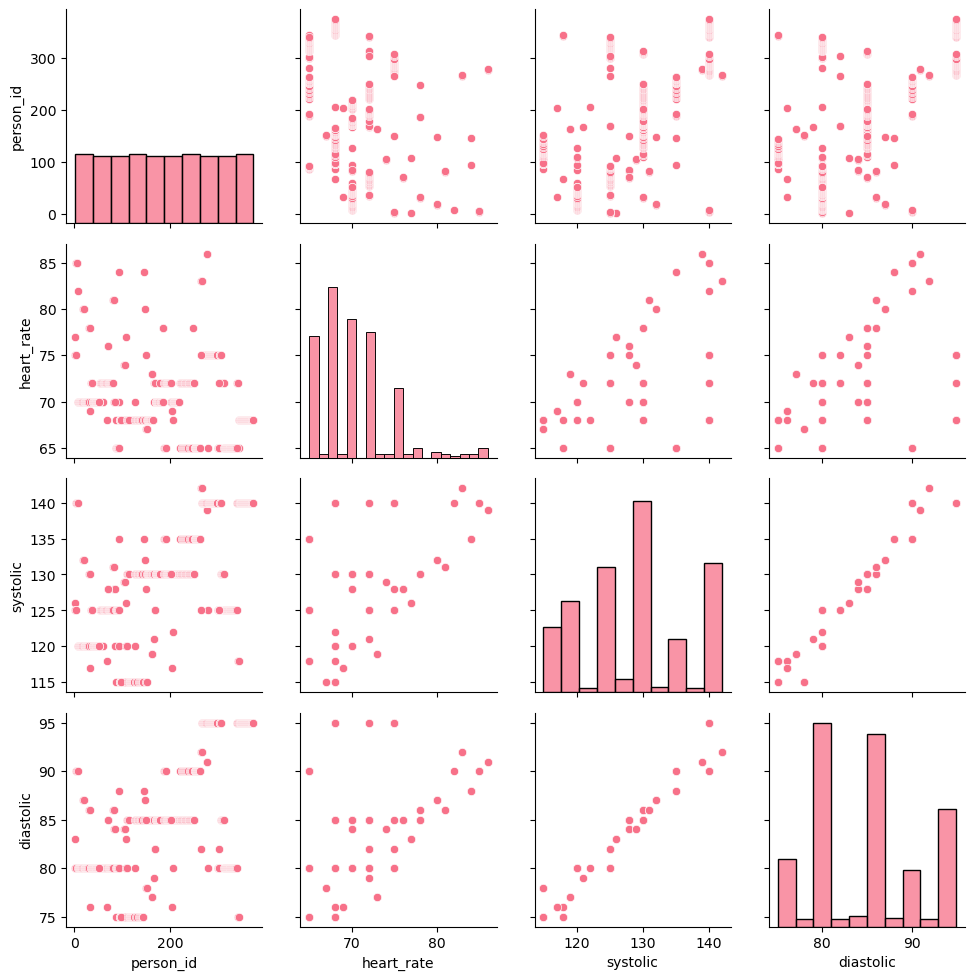

In [17]:
health_metrics = data[['person_id','heart_rate','systolic','diastolic']]
h_diag = sns.PairGrid(data=health_metrics)
h_diag.map_diag(sns.histplot)
h_diag.map_offdiag(sns.scatterplot)
plt.show()